Epoch [1/50], Loss: 0.0294
Epoch [2/50], Loss: 0.0228
Epoch [3/50], Loss: 0.0198
Epoch [4/50], Loss: 0.0242
Epoch [5/50], Loss: 0.0190
Epoch [6/50], Loss: 0.0226
Epoch [7/50], Loss: 0.0220
Epoch [8/50], Loss: 0.0213
Epoch [9/50], Loss: 0.0173
Epoch [10/50], Loss: 0.0173
Epoch [11/50], Loss: 0.0184
Epoch [12/50], Loss: 0.0140
Epoch [13/50], Loss: 0.0164
Epoch [14/50], Loss: 0.0140
Epoch [15/50], Loss: 0.0162
Epoch [16/50], Loss: 0.0167
Epoch [17/50], Loss: 0.0158
Epoch [18/50], Loss: 0.0174
Epoch [19/50], Loss: 0.0196
Epoch [20/50], Loss: 0.0174
Epoch [21/50], Loss: 0.0169
Epoch [22/50], Loss: 0.0174
Epoch [23/50], Loss: 0.0181
Epoch [24/50], Loss: 0.0198
Epoch [25/50], Loss: 0.0158
Epoch [26/50], Loss: 0.0197
Epoch [27/50], Loss: 0.0158
Epoch [28/50], Loss: 0.0148
Epoch [29/50], Loss: 0.0160
Epoch [30/50], Loss: 0.0162
Epoch [31/50], Loss: 0.0159
Epoch [32/50], Loss: 0.0153
Epoch [33/50], Loss: 0.0188
Epoch [34/50], Loss: 0.0147
Epoch [35/50], Loss: 0.0178
Epoch [36/50], Loss: 0.0165
E

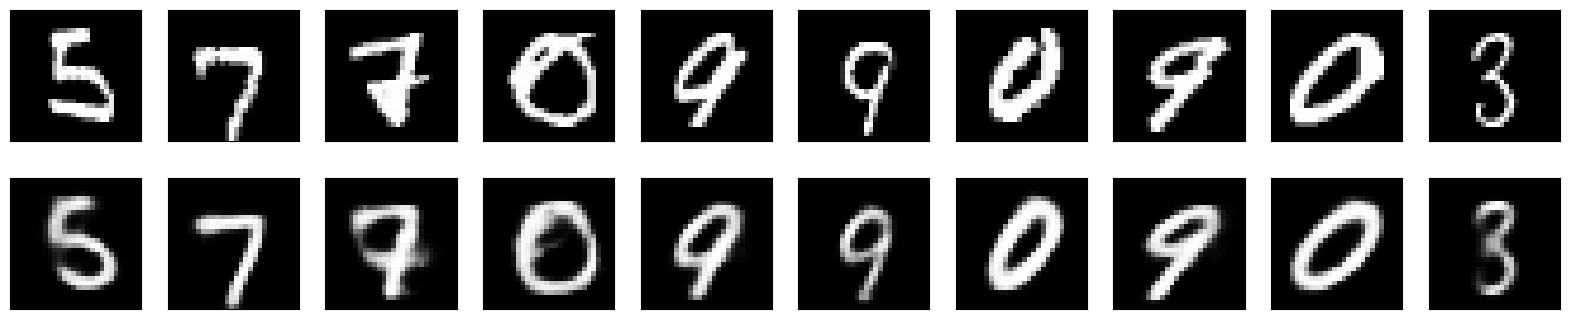

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary

# Define a simple Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 7)  # Encoder dimension is 7
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid()  # Sigmoid activation for pixel values in [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

# Initialize the model
autoencoder = Autoencoder()
# summary(autoencoder, (784))

# Define the loss function and optimizer
criterion = nn.MSELoss()

optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Set the device to CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder.to(device)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    for data in data_loader:
        images, _ = data
        images = images.view(images.size(0), -1).to(device)  # Flatten images and move to the device

        # Forward pass
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Testing the autoencoder
with torch.no_grad():
    test_images, _ = next(iter(data_loader))
    test_images = test_images.view(test_images.size(0), -1).to(device)
    reconstructed = autoencoder(test_images)

# Move reconstructed images and test images back to CPU for visualization
reconstructed = reconstructed.cpu().numpy()
test_images = test_images.cpu().numpy()

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
